In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection
from sklearn import ensemble

In [2]:
wine = datasets.load_wine()

In [3]:
# 随机森林和决策树建模对比

Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(wine.data,wine.target,test_size=0.3)

clf = tree.DecisionTreeClassifier(random_state=0)
rfc = ensemble.RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c))
print("Random Forest:{}".format(score_r))

Single Tree:0.9259259259259259
Random Forest:0.9629629629629629


D:\Anconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


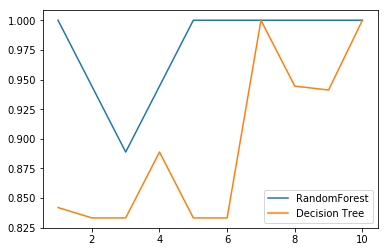

In [4]:
# 随机森林和决策树在一组交叉验证下的效果对比

clf = tree.DecisionTreeClassifier()
clf_s = model_selection.cross_val_score(clf,wine.data,wine.target,cv=10)

rfc = ensemble.RandomForestClassifier(n_estimators=25)
rfc_s = model_selection.cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()   

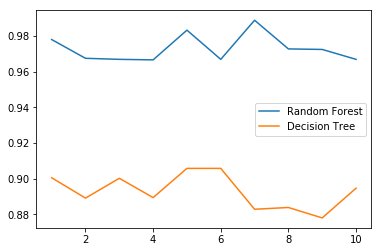

In [4]:
# 随机森林和决策树在十组交叉验证下的效果对比

rfc_l = []
clf_l = []

for i in range(10):
    rfc = ensemble.RandomForestClassifier(n_estimators=25)
    rfc_s = model_selection.cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = tree.DecisionTreeClassifier()
    clf_s = model_selection.cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.9891812865497076 33


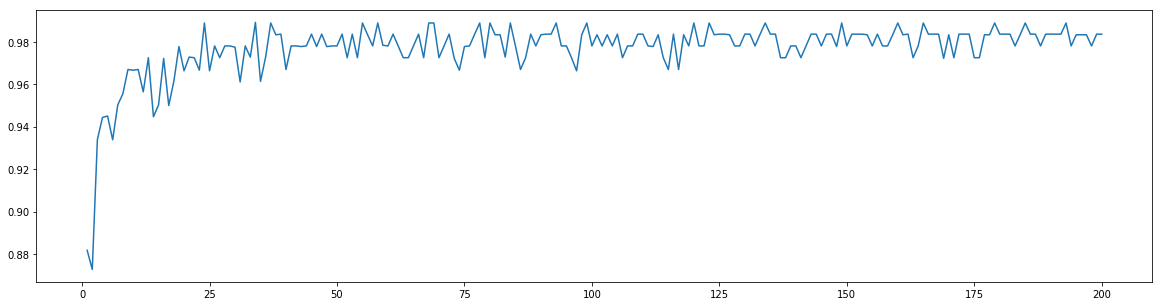

In [6]:
#n_estimators的学习曲线

superpa = []
for i in range(200):
    rfc = ensemble.RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = model_selection.cross_val_score(rfc,wine.data,wine.target,cv=10).mean() 
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))) #返回的是索引

plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show() 